In [1]:
%pip install scikit-learn
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd

In [4]:
# Setting the random seed for reproducibility
np.random.seed(125)

In [5]:
n_samples = 1000
class_0_ratio = 0.87
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0
n_class_0, n_class_1

(870, 130)

In [6]:
# Imbalanced Dataset Creating
df_class_0 = pd.DataFrame({
  'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
  'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
  'target': [0] * n_class_0,
})

df_class_1 = pd.DataFrame({
  'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
  'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
  'target': [1] * n_class_1,
})

In [7]:
df = pd.concat([df_class_0, df_class_1]).reset_index(drop=True)

In [8]:
df.tail()

,feature_1,feature_2,target
995,3.291756,2.703569,1
996,1.315589,2.432378,1
997,2.731975,0.938716,1
998,2.883742,2.751444,1
999,2.562514,2.349098,1


### Up Sampling

In [9]:
df.target.value_counts()

target
0    870
1    130
Name: count, dtype: int64

In [10]:
df_majority = df[df.target == 0]
df_minority = df[df.target == 1]

In [11]:
from sklearn.utils import resample

df_minority_upsampled = resample(df_minority, replace=True, #Sample with Replacement 
                                 n_samples=len(df_majority), random_state=42)
df_minority.shape, df_minority_upsampled.shape

((130, 3), (870, 3))

In [12]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.target.value_counts()

target
0    870
1    870
Name: count, dtype: int64

### Down Sampling

In [13]:
df.target.value_counts()

target
0    870
1    130
Name: count, dtype: int64

In [14]:
df_majority = df[df.target == 0]
df_minority = df[df.target == 1]

In [15]:
from sklearn.utils import resample

df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)
df_majority.shape, df_majority_downsampled.shape

((870, 3), (130, 3))

In [16]:
df_downsampled = pd.concat([df_minority, df_majority_downsampled])
df_downsampled.target.value_counts()

target
1    130
0    130
Name: count, dtype: int64

## SMOTE - Synthetic Minority Oversampling Technique

In [17]:
from sklearn.datasets import make_classification
import pandas as pd

In [18]:
X, y = make_classification(n_samples=1000, n_features=2, n_clusters_per_class=1, weights=[0.90], random_state=12, n_redundant=0)

In [19]:
df_X = pd.DataFrame(X, columns=["f1", "f2"])
df_y = pd.DataFrame(y, columns=["target"])
df = pd.concat([df_X, df_y], axis=1)
df.tail()

,f1,f2,target
995,-0.712495,-0.880452,0
996,-2.625830,-2.827891,0
997,-1.326439,-1.815178,0
998,-0.833486,-0.514647,0
999,-0.302876,-0.575975,0


In [20]:
df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

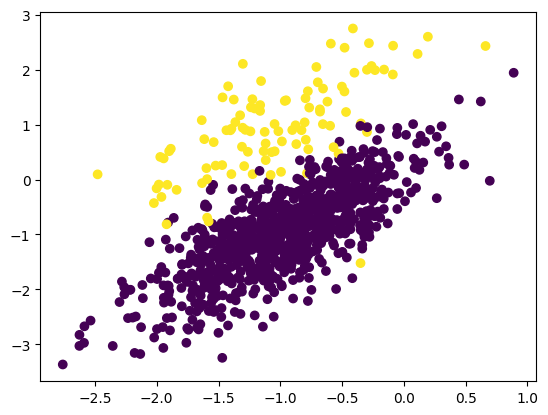

In [21]:
import matplotlib.pyplot as plt
plt.scatter(df.f1, df.f2, c=df.target)

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
over_sample = SMOTE()
X, y = over_sample.fit_resample(df[['f1', 'f2']], df.target)

In [25]:
X.shape, y.shape

((1800, 2), (1800,))

In [29]:
y.value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [30]:
df_X = pd.DataFrame(X, columns=["f1", "f2"])
df_y = pd.DataFrame(y, columns=["target"])
over_sample_df = pd.concat([df_X, df_y], axis=1)
over_sample_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


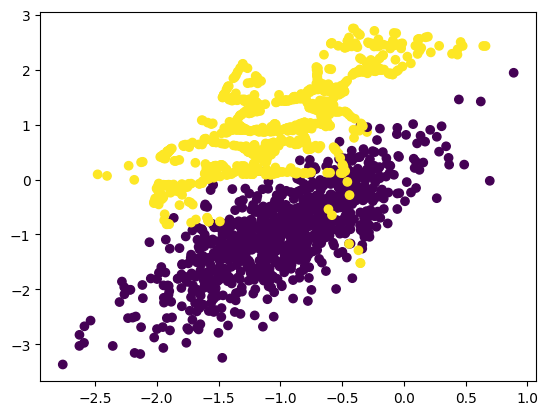

In [31]:
plt.scatter(over_sample_df.f1, over_sample_df.f2, c=over_sample_df.target)